In [3]:
import zipfile, os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
# Mengunduh data
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-25 06:34:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.57MB/s    in 41s     

2020-06-25 06:35:08 (7.44 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# Melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
# Install untuk spliting folder
!pip install split-folders
!pip install split-folders tqdm

In [11]:
# Membagi dataset data train dan validatiion
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/output_split", seed=1337, ratio=(.8, .2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 442 files [00:00, 4416.54 files/s]
Copying files: 865 files [00:00, 4355.49 files/s]
Copying files: 1249 files [00:00, 4177.02 files/s]
Copying files: 1642 files [00:00, 4099.08 files/s]
Copying files: 2188 files [00:00, 3601.91 files/s]


In [12]:
# Mendefinisikan nama direktori untuk data latih dan data validasi
base_dir = '/tmp/rockpaperscissors/output_split'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [15]:
# Melihat isi folder val
os.listdir('/tmp/rockpaperscissors/output_split/val')

['scissors', 'rock', 'paper']

In [16]:
# Melihat isi folder train
os.listdir('/tmp/rockpaperscissors/output_split/train')

['scissors', 'rock', 'paper']

In [17]:
# Membuat direktori rock, scissors, dan paper pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
     
# Membuat direktori rock, scissors, dan paper pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [45]:
# Augmentasi gambar dengan ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest')
     
test_datagen = ImageDataGenerator(
               rescale=1./255,
               rotation_range=20,
               horizontal_flip=True,
               shear_range = 0.2,
               fill_mode = 'nearest')

In [46]:
# Mempersiapkan berkas latih
train_generator = train_datagen.flow_from_directory(
            train_dir,  
            target_size=(150, 150), 
            batch_size=4,
            class_mode='categorical'
)
     
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150), 
            batch_size=4, 
            class_mode='categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [47]:
# Membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [48]:
# Memanggil fungsi compile pada objek model, dan menentukan loss function serta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [49]:
# Melatih model menggunakan metode fit
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=1)

Epoch 1/20
25/25 [==============================] - 6s 259ms/step - loss: 2.2190 - accuracy: 0.3900 - val_loss: 1.1345 - val_accuracy: 0.3000
Epoch 2/20
25/25 [==============================] - 6s 254ms/step - loss: 1.1161 - accuracy: 0.3300 - val_loss: 1.2667 - val_accuracy: 0.2500
Epoch 3/20
25/25 [==============================] - 6s 253ms/step - loss: 1.1234 - accuracy: 0.3000 - val_loss: 1.0617 - val_accuracy: 0.3000
Epoch 4/20
25/25 [==============================] - 6s 247ms/step - loss: 1.1111 - accuracy: 0.4124 - val_loss: 3.6660 - val_accuracy: 0.3000
Epoch 5/20
25/25 [==============================] - 7s 260ms/step - loss: 1.0771 - accuracy: 0.5700 - val_loss: 0.7676 - val_accuracy: 0.6000
Epoch 6/20
25/25 [==============================] - 6s 253ms/step - loss: 0.8700 - accuracy: 0.6600 - val_loss: 0.6630 - val_accuracy: 0.8500
Epoch 7/20
25/25 [==============================] - 6s 253ms/step - loss: 0.6015 - accuracy: 0.7600 - val_loss: 0.5054 - val_accuracy: 0.8000
Epoch 

Saving coba_gambar.png to coba_gambar (2).png
coba_gambar.png
GUNTING


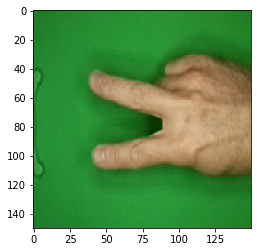

In [60]:
# Melakukan prediksi gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result=np.argmax(classes)
  
  print(fn)
  if result==0:
    print('KERTAS')
  elif result==1:
    print('BATU')
  elif result==2:
    print('GUNTING')